# Simple Linear Regression

## Project Overview
This project aims to predict the daily revenue of a coffee shop using machine learning techniques. We explore different regression approaches including simple linear regression, multiple linear regression, and polynomial regression to find the most accurate and interpretable model.

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures

### Load and View the Dataset

We load the dataset using `pandas` and preview the first few rows to understand its structure. This helps identify the features and the target variable (`Daily_Revenue`).

In [269]:
df = pd.read_csv('coffee_shop_revenue.csv')
print(df.head())

   Number_of_Customers_Per_Day  Average_Order_Value  Operating_Hours_Per_Day  \
0                          152                 6.74                       14   
1                          485                 4.50                       12   
2                          398                 9.09                        6   
3                          320                 8.48                       17   
4                          156                 7.44                       17   

   Number_of_Employees  Marketing_Spend_Per_Day  Location_Foot_Traffic  \
0                    4                   106.62                     97   
1                    8                    57.83                    744   
2                    6                    91.76                    636   
3                    4                   462.63                    770   
4                    2                   412.52                    232   

   Daily_Revenue  
0        1547.81  
1        2084.68  
2        3118.39 

###  Correlation Analysis

We calculate the correlation between each feature and the target variable to identify which single feature is most strongly related to `Daily_Revenue`. This helps us choose the best candidate for simple linear regression.


In [271]:
correlations = df.corr()['Daily_Revenue'].drop('Daily_Revenue')
best_feature = correlations.abs().idxmax()
print(correlations)

Number_of_Customers_Per_Day    0.736461
Average_Order_Value            0.535694
Operating_Hours_Per_Day       -0.005323
Number_of_Employees            0.003295
Marketing_Spend_Per_Day        0.254812
Location_Foot_Traffic          0.013469
Name: Daily_Revenue, dtype: float64


In [272]:
X = df[[best_feature]]
y = df['Daily_Revenue']

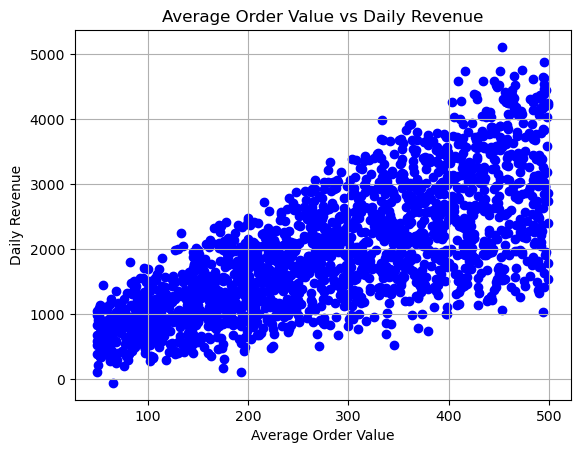

In [273]:
plt.scatter(X, y, color='blue')
plt.xlabel('Average Order Value')
plt.ylabel('Daily Revenue')
plt.title('Average Order Value vs Daily Revenue')
plt.grid(True)
plt.show()

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Simple Linear Regression

We apply simple linear regression using the most correlated feature. This helps us build an initial model and set a baseline for performance.

In [276]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [277]:
y_pred = model.predict(X_test)

In [278]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 401391.88402129925
R-squared: 0.570413778585338


###  Visualization of Simple Linear Regression

We visualize the relationship between the chosen feature and `Daily_Revenue`, plotting the actual vs. predicted values to assess how well the model captures the pattern in the data.

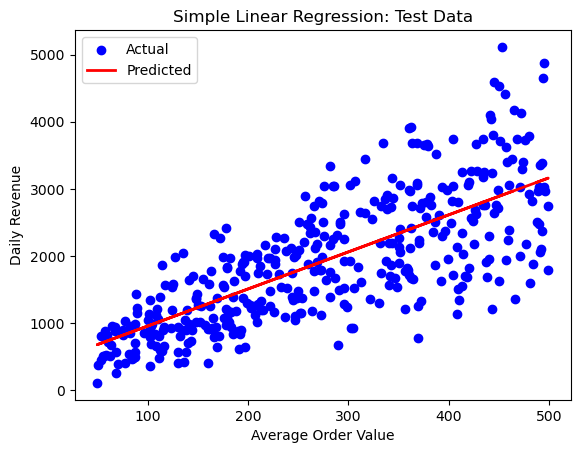

In [280]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('Average Order Value')
plt.ylabel('Daily Revenue')
plt.title('Simple Linear Regression: Test Data')
plt.legend()
plt.show()

# Multiple Linear Regression

Here, we use all available features to train a multiple linear regression model. We compare its performance to simple linear regression to determine whether using all features improves accuracy.

In [283]:
X = df.drop(columns=['Daily_Revenue'])
y = df['Daily_Revenue']

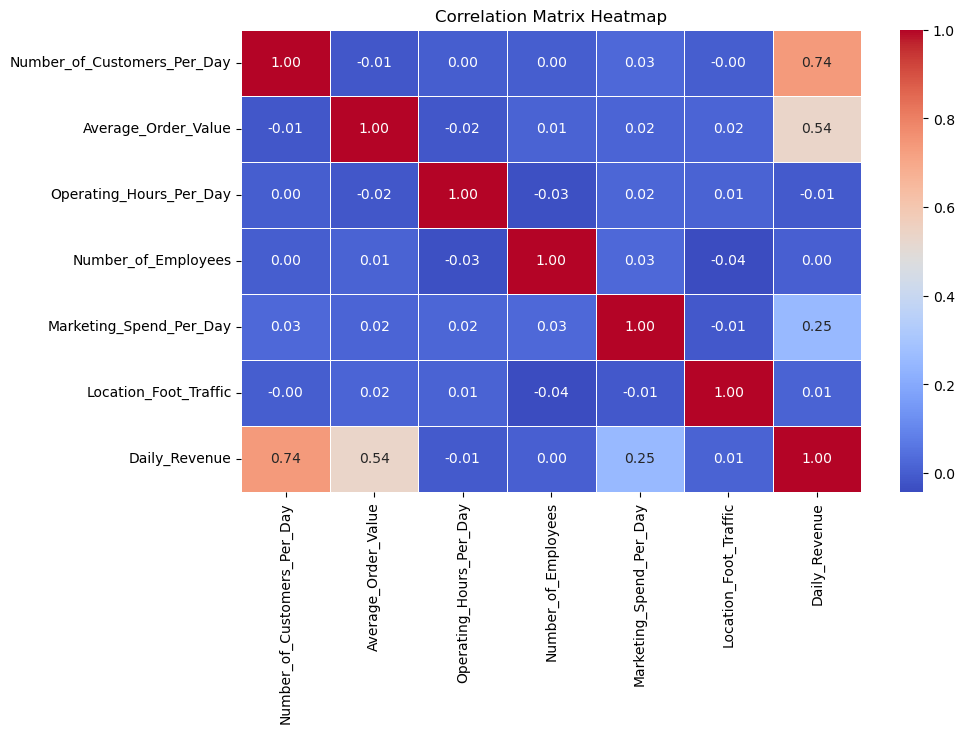

In [284]:
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [286]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [287]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [288]:
y_pred = model.predict(X_test_scaled)

### Evaluation of Multiple Linear Regression

We evaluate the model's performance using Mean Squared Error (MSE) and R-squared metrics. These metrics give us insight into how well the model fits the test data.

In [290]:
mse = mean_squared_error(y_test, y_pred)
r_squared = model.score(X_test_scaled, y_test)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r_squared}")

Mean Squared Error: 97569.72294013854
R-squared: 0.895576840810998


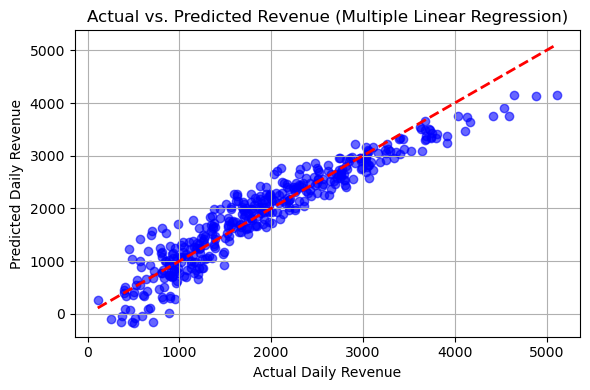

In [291]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel('Actual Daily Revenue')
plt.ylabel('Predicted Daily Revenue')
plt.title('Actual vs. Predicted Revenue (Multiple Linear Regression)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Polynomial Linear Regression

We apply polynomial regression using the best-performing single feature. By testing degrees 2, 3, and 4, we aim to model non-linear relationships and see if higher-order terms improve accuracy.

In [294]:
correlations = df.corr()['Daily_Revenue'].drop('Daily_Revenue')
best_feature = correlations.abs().idxmax()
print(correlations)

Number_of_Customers_Per_Day    0.736461
Average_Order_Value            0.535694
Operating_Hours_Per_Day       -0.005323
Number_of_Employees            0.003295
Marketing_Spend_Per_Day        0.254812
Location_Foot_Traffic          0.013469
Name: Daily_Revenue, dtype: float64


In [295]:
X = df[[best_feature]]
y = df['Daily_Revenue']

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  Polynomial Regression: Visualization and Comparison

We visualize the actual vs. predicted values for each polynomial degree. This helps us compare model complexity and performance visually and numerically using MSE and R².


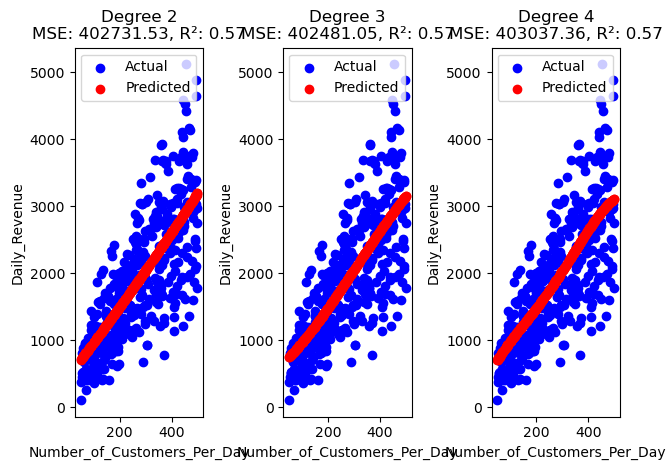

In [298]:
for i, d in enumerate(degrees, 1):
    poly = PolynomialFeatures(degree=d)
    X_train_poly = poly.fit_transform(X_train[[best_feature]])
    X_test_poly = poly.transform(X_test[[best_feature]])
    
    scaler = StandardScaler()
    X_train_poly_scaled = scaler.fit_transform(X_train_poly)
    X_test_poly_scaled = scaler.transform(X_test_poly)

    model = LinearRegression()
    model.fit(X_train_poly_scaled, y_train)
    y_pred = model.predict(X_test_poly_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    plt.subplot(1, 3, i)
    plt.scatter(X_test[[best_feature]], y_test, color='blue', label='Actual')
    plt.scatter(X_test[[best_feature]], y_pred, color='red', label='Predicted')
    plt.title(f'Degree {d}\nMSE: {mse:.2f}, R²: {r2:.2f}')
    plt.xlabel(best_feature)
    plt.ylabel('Daily_Revenue')
    plt.legend()

plt.tight_layout()
plt.show()

## Summary of Findings

In this project, we applied three different types of regression models to predict the daily revenue of a coffee shop based on various factors, including the number of customers, average order value, operating hours, number of employees, and marketing spend. We evaluated the models' performance using **Mean Squared Error (MSE)** and **R-squared (R²)**. The three models explored were **Simple Linear Regression**, **Multiple Linear Regression**, and **Polynomial Regression**.

### **1. Simple Linear Regression**
- In **Simple Linear Regression**, we focused on predicting daily revenue using the best-performing single feature (e.g., `Number_of_Customers_Per_Day`).
- The model showed a moderate fit to the data, with a reasonable R² score. However, it was limited to capturing only the linear relationship between the selected feature and the target variable, leading to potential underfitting.

### **2. Multiple Linear Regression**
- **Multiple Linear Regression** considered multiple features simultaneously, allowing the model to capture more complex relationships between the input variables and daily revenue.
- The model demonstrated a significant improvement in performance compared to the simple linear regression. The R² score was higher, indicating a better fit to the data.
- Multiple features provided more context for the prediction, and the model performed better when accounting for interactions between features like `Number_of_Customers_Per_Day`, `Operating_Hours_Per_Day`, and `Marketing_Spend_Per_Day`.

### **3. Polynomial Regression**
- **Polynomial Regression** was used to model non-linear relationships between the features and daily revenue. We explored polynomial degrees 2, 3, and 4 for the best-performing feature.
- While polynomial regression models captured more complex relationships, they did not significantly outperform the multiple linear regression model, as indicated by similar MSE and R² scores across different polynomial degrees.
- The results suggested that the relationships between the selected features and daily revenue may not be highly non-linear, and simpler models (such as linear regression) might suffice for this dataset.

### **General Observations:**
- The **Multiple Linear Regression** model generally outperformed the **Simple Linear Regression** and **Polynomial Regression** models, as it incorporated more variables for prediction, leading to a better model fit.
- The **Polynomial Regression** models (degrees 2, 3, and 4) did not show substantial improvements, which indicates that the relationship between features and daily revenue is likely linear or only slightly non-linear.
 